In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from xgboost import XGBRegressor

# Load the Dataset

In [5]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.shape

(19237, 18)

In [7]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Levy: a tax or fee imposed on the vehicle

# Data Cleaning


In [6]:
# check the unique values for each attributes
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*80)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
********************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
********************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '9

we can see 'Levy', 'Mileage', Engine Volume' need to be cleaned

In [7]:
# Levy
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [8]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/4287018540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({'-':np.nan}, inplace = True)


In [9]:
# Replacement: Yes >> True , No >> False
df['Leather interior'].replace({'Yes':True, 'No':False}, inplace=True)

/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/2364113765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Leather interior'].replace({'Yes':True, 'No':False}, inplace=True)
/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/2364113765.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [10]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [11]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [12]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)


/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/3762201810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/3762201810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [13]:
cars = df.drop('ID', axis=1)

In [14]:
cars.head(20)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,False
6,1803,761.0,TOYOTA,Prius,2010,Hatchback,True,Hybrid,1.8,258909,4.0,Automatic,Front,4,Left wheel,White,12,False
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
8,1098,394.0,TOYOTA,Camry,2014,Sedan,True,Hybrid,2.5,398069,4.0,Automatic,Front,4,Left wheel,Black,12,False
9,26657,NaN,LEXUS,RX 350,2007,Jeep,True,Petrol,3.5,128500,6.0,Automatic,4x4,4,Left wheel,Silver,12,False


In [15]:
display(cars[cars.Price == cars.Price.max()])
display(cars[cars.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,True,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,True,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [16]:
display(cars[cars.Mileage == cars.Mileage.max()])
display(cars[cars.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,False,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,False,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,False,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,NaN,UAZ,31514,1968,Jeep,True,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,NaN,BMW,525,1995,Sedan,False,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,False,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995.0,FORD,Transit,2003,Microbus,False,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,False,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,False,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,True,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,True,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,False,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,False,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


**Delete Outliers**

In [17]:
def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [18]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(cars,features, 1.5)
deleted_df = cars.drop(cars.loc[outliers].index,axis=0)

In [19]:
print(cars.shape)
print(deleted_df.shape)

(19237, 18)
(17527, 18)


/var/folders/gy/bylk180j7lngr3681t0sd1x00000gn/T/ipykernel_11080/693268328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top10_cars.index, y = top10_cars.values, palette='hot')


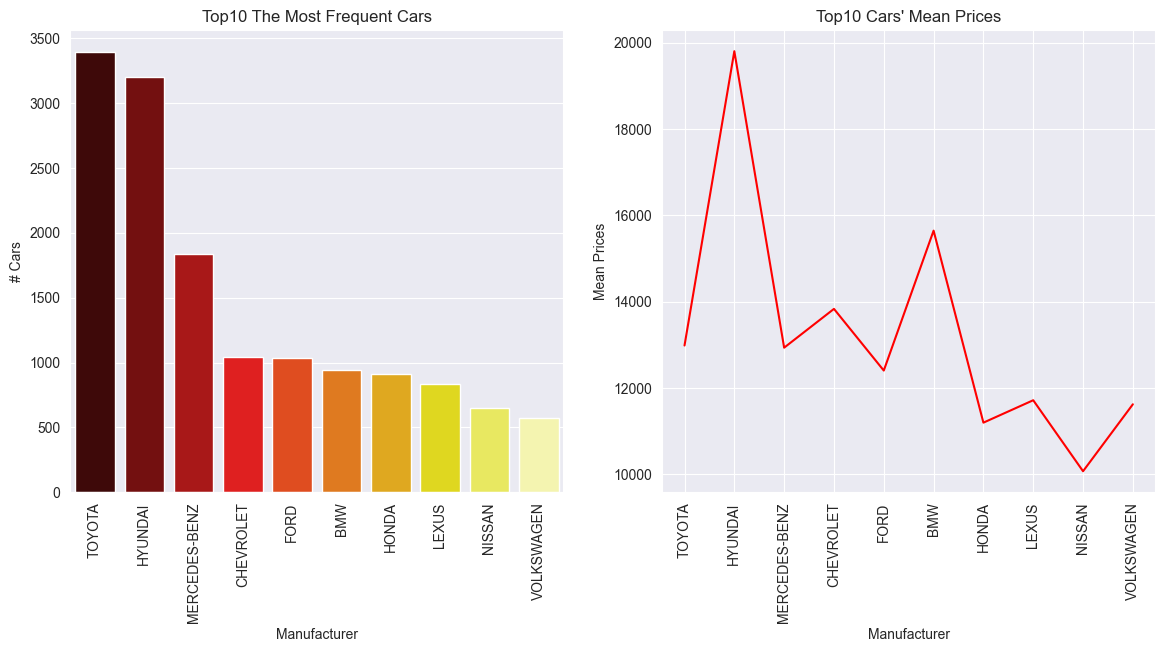

In [20]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(x = top10_cars.index, y = top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(x = top10_cars.index, y = top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

Top 10 Cars: TOYOTA, HYUNDAI, MERCEDES-BENZ, CHEVROLET, FORD, BMW, HONDA, LEXUS, NISSAN, VOLKSWAGEN

# EDA

In [21]:
# 不同doors下， drive wheels出现的次数
deleted_df.groupby('Doors')['Drive wheels'].value_counts()

Doors  Drive wheels
2      Rear              335
       Front             285
       4x4               103
4      Front           11528
       4x4              3440
       Rear             1723
5      Front              54
       Rear               30
       4x4                29
Name: count, dtype: int64

In [22]:
deleted_df.groupby('Drive wheels')['Price'].mean().sort_values(ascending = False)

Drive wheels
Front    14700.483441
Rear     13662.755268
4x4      12958.593505
Name: Price, dtype: float64

In [23]:
deleted_df.groupby('Gear box type')['Price'].median().sort_values(ascending = False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [24]:
deleted_df.groupby('Color')['Price'].mean().sort_values(ascending = False)

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [25]:
deleted_df.groupby('Turbo')['Price'].median().sort_values(ascending = False)

Turbo
True     18189.0
False    11917.0
Name: Price, dtype: float64

In [26]:
deleted_df.groupby('Wheel')['Price'].median().sort_values(ascending = False)

Wheel
Left wheel          13485.0
Right-hand drive     8467.0
Name: Price, dtype: float64

In [27]:
deleted_df.groupby('Fuel type')['Price'].median().sort_values(ascending = False)

Fuel type
Plug-in Hybrid    22580.0
Hydrogen          20385.0
Diesel            18817.0
LPG               13485.0
Petrol            11917.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

In [28]:
deleted_df['Fuel type'].value_counts()

Fuel type
Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: count, dtype: int64

y  min/max : 1.0 26307500.0
log1p min/max: 0.6931471805599453 17.085364665609077


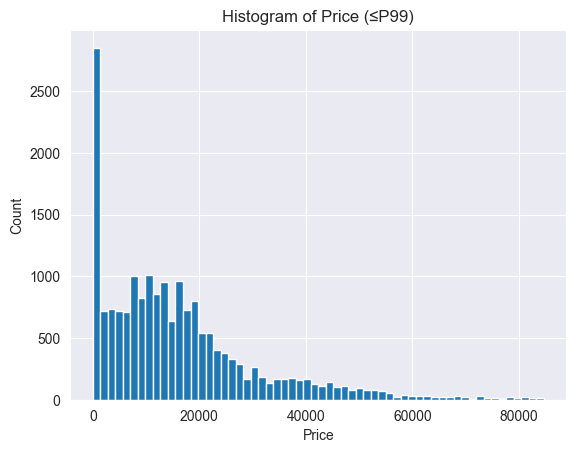

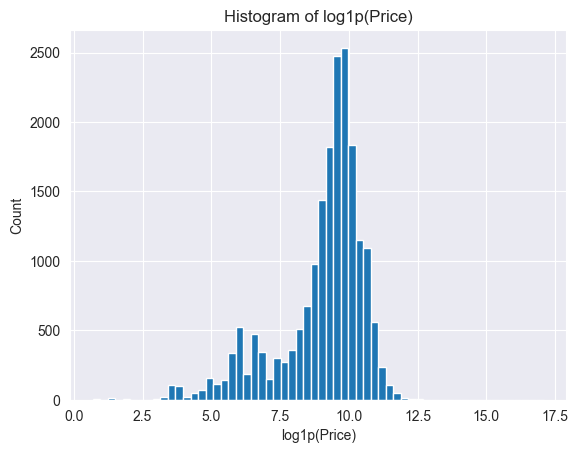

mean/median : 1.4087402993910993
skewness    : 136.47042654268714
ex.kurtosis : 18824.517328899325
P95/P50     : 3.7548587913756455   P99/P50: 6.428408745824476
Top 1% share: 14.16%


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

y = np.asarray(y, dtype=float)

print("y  min/max :", y.min(), y.max())
lp = np.log1p(y)
print("log1p min/max:", lp.min(), lp.max())  # 期望 ~6~11

# 看分布（原尺度，截到P99）
p99 = np.percentile(y, 99)
plt.figure(); plt.hist(y[y<=p99], bins=60, edgecolor="white")
plt.title("Histogram of Price (≤P99)"); plt.xlabel("Price"); plt.ylabel("Count")

# 正确的 log1p 直方图
plt.figure(); plt.hist(lp, bins=60, edgecolor="white")
plt.title("Histogram of log1p(Price)"); plt.xlabel("log1p(Price)"); plt.ylabel("Count")
plt.show()

# 长尾定量指标
mean_, median_ = y.mean(), np.median(y)
q50, q95, q99 = np.percentile(y, [50,95,99])
print("mean/median :", mean_/median_)
print("skewness    :", skew(y, bias=False))
print("ex.kurtosis :", kurtosis(y, fisher=True, bias=False))
print("P95/P50     :", q95/q50, "  P99/P50:", q99/q50)
top_share = y[y>=q99].sum()/y.sum()
print("Top 1% share:", f"{top_share:.2%}")


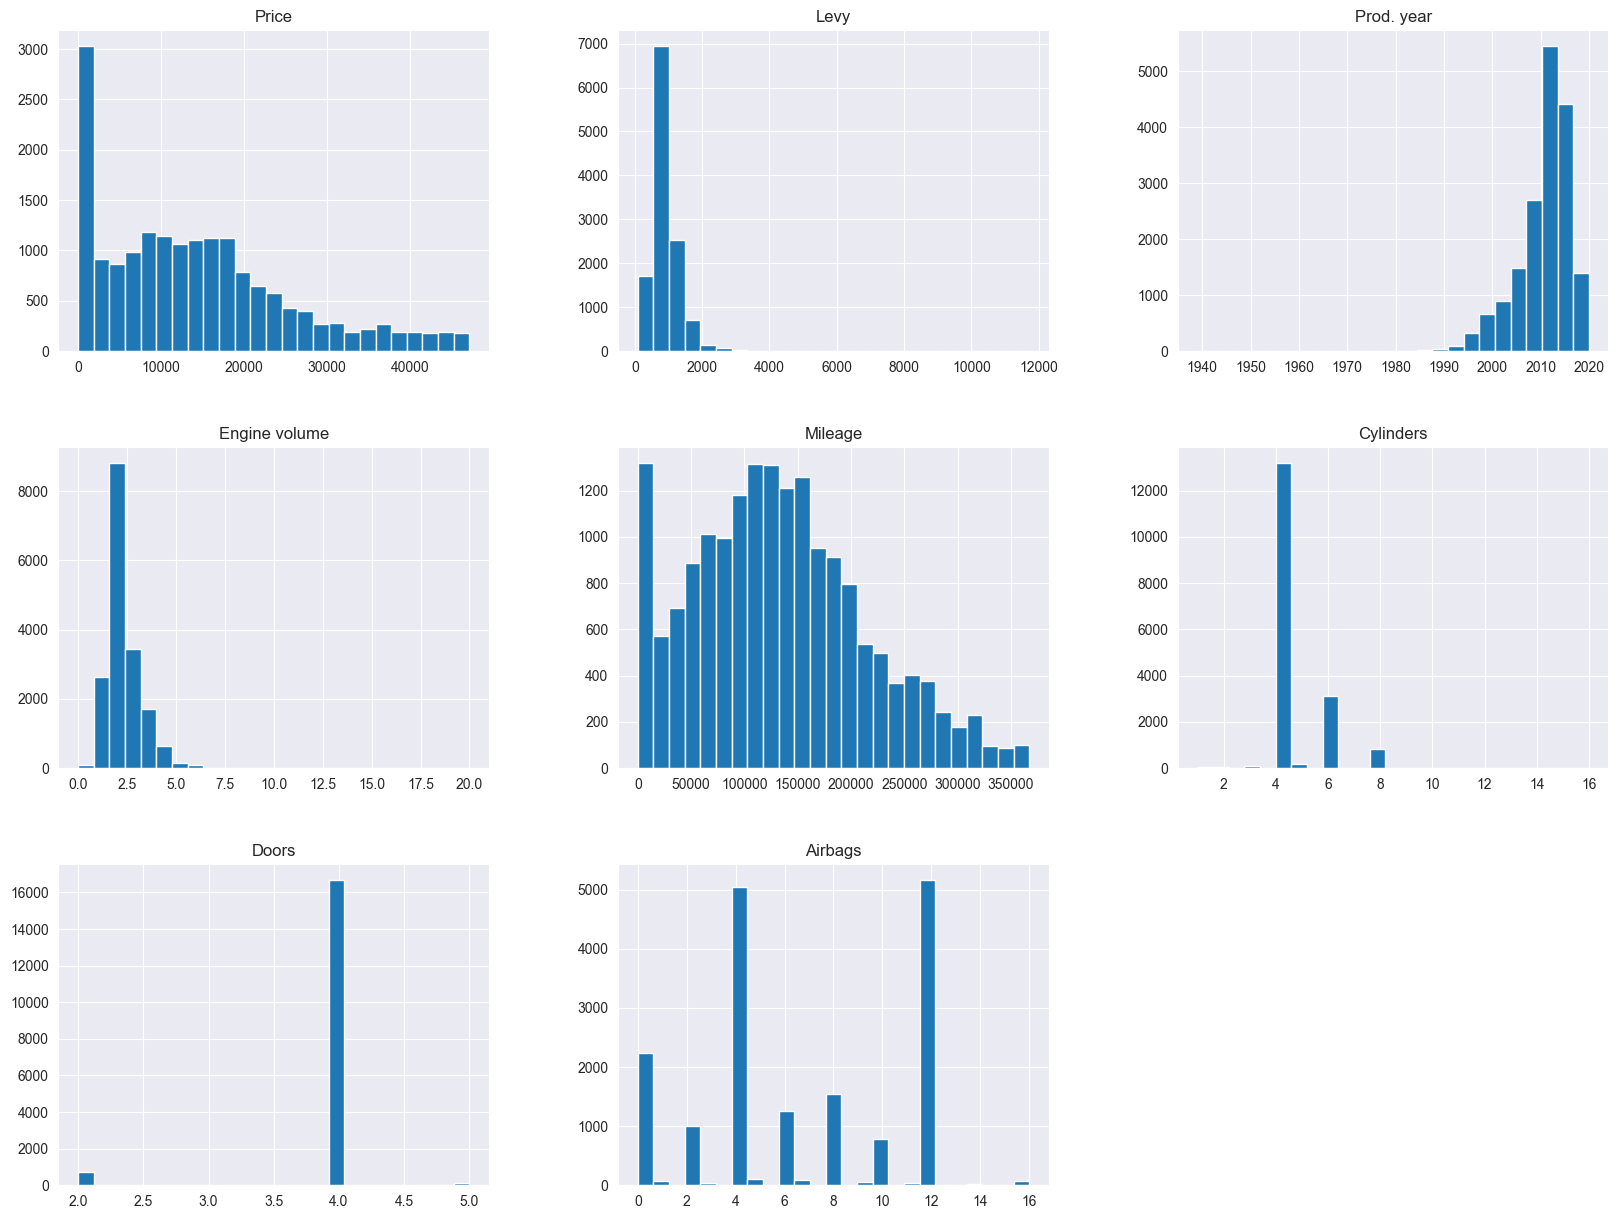

In [40]:
deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

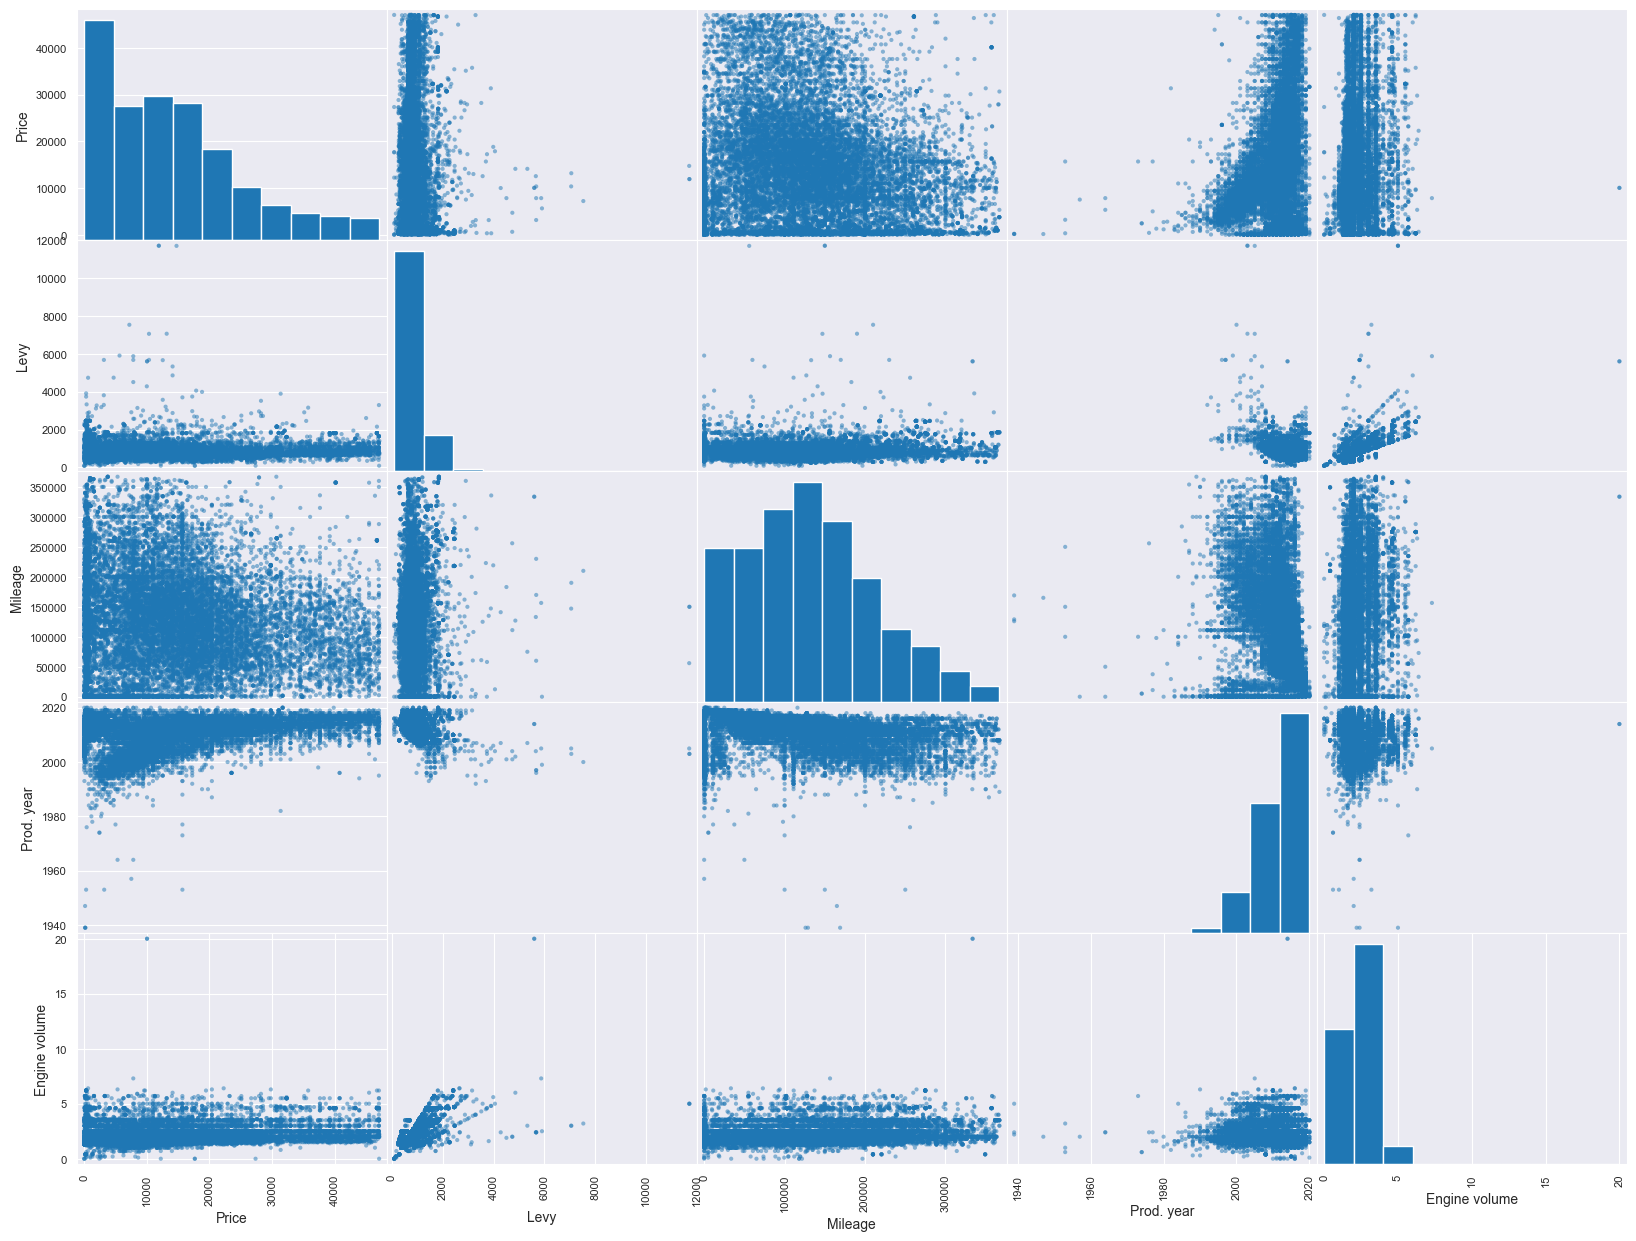

In [43]:
from pandas.plotting import scatter_matrix
attributes = ['Price', 'Levy', 'Mileage', 'Prod. year', 'Engine volume']
scatter_matrix(deleted_df[attributes], figsize=(20,15))
plt.show()

In [44]:
deleted_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,True,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,True
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,True,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,True,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,True,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4,False


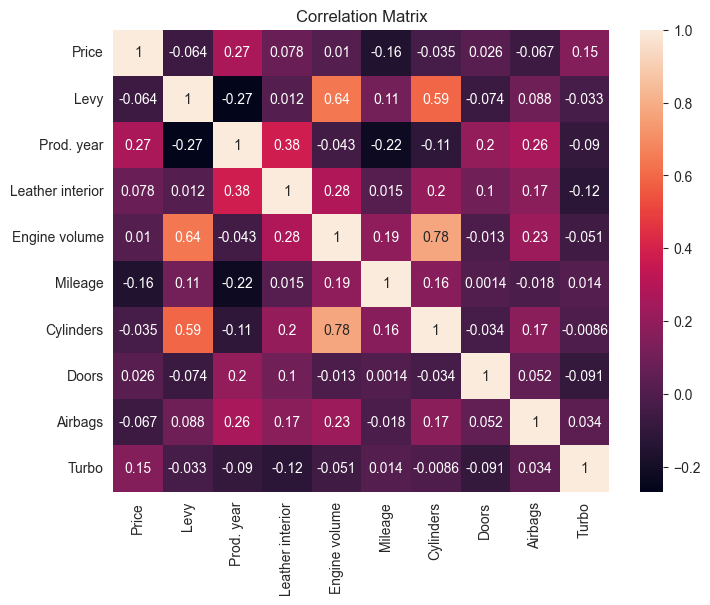

In [48]:
num_df = deleted_df.select_dtypes(include=['number', 'bool'])
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

levy - engine volume 0.64

levy - cylinders 0.59

engine volume - cylinders 0.78 

the cars have more cylinders have more engine volume and Levy.

# Model

In [93]:
num_attributes = ['Levy','Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attributes = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

ALL_COLS = num_attributes + cat_attributes

In [94]:
num_cars = deleted_df[num_attributes]
# y = deleted_df['Price']
cat_cars = deleted_df[cat_attributes]

**填补缺失值**

In [95]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)

display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 4.00000e+00, 1.26265e+05,
       4.00000e+00, 6.00000e+00])

**标准化**

In [96]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [97]:
num_cars.mean(axis=0)


array([ 2.39185379e-17, -1.42688268e-14,  3.16616578e-16, -4.17864965e-16,
        5.83774485e-17, -2.18510033e-16, -5.47288579e-17])

In [98]:
num_cars.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

**pipeline**

In [99]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

**handle categorical columns -- one hot encoding**

In [100]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("one", OneHotEncoder(handle_unknown="ignore")),
])

In [101]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
], remainder="drop")
# cars_prepared = full_pipeline.fit_transform(deleted_df)

**split data for train and test**

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.2, random_state=42)

In [102]:
X = deleted_df[ALL_COLS].copy()
y = deleted_df['Price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42, max_features=35)

In [76]:
final_pipeline = Pipeline([
    ('prep', full_pipeline),
    ('model', model)
])

In [77]:
final_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
prep_test = final_pipeline.predict(X_test)
mse = mean_squared_error(y_test, prep_test)
rmse = np.sqrt(mse)
print(f"Validation MSE: {mse:,.2f}")
print(f"Validation RMSE: {rmse:,.2f}")

Validation MSE: 35,200,329.11
Validation RMSE: 5,932.99


In [79]:
y_pred = final_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

R²: 0.732


## Linear Regression

In [62]:
model = LinearRegression()
final_pipeline = Pipeline([
    ('prep', full_pipeline),
    ('model', model)
])
final_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
# rmse
predictions = final_pipeline.predict(X_test)
linear_mse = mean_squared_error(y_test, predictions)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

np.float64(9248.575197865797)

it means we are approximately 9252 away from actual prices.

In [66]:
# mae
mae = mean_absolute_error(y_test, predictions)
mae

7193.066577689147

## DecisionTreeRegressor

In [70]:
treeregressor = DecisionTreeRegressor(max_depth=5, random_state=42)
treeregressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [71]:
# rmse
tree_predictions = treeregressor.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(8260.434783324428)

## Forest Regression

In [72]:
forestregressor = RandomForestRegressor(n_estimators=100, random_state=42)

forestregressor.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
forest_predictions = forestregressor.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(3321.078969687672)

In [ ]:
r2_squares = r2_score(y_test, forest_predictions)

In [74]:
forest_scores = cross_val_score(forestregressor, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([6135.67838771, 6282.48900906, 6237.46879505, 6101.22458186,
       5920.60265175])

In [72]:
param_grid = [
    {'model__n_estimators': [300, 500], 'model__max_features': [35,33,31]},
  ]

model = RandomForestRegressor(random_state=42)

final_pipeline = Pipeline([
    ('prep', full_pipeline),
    ('model', model)
])
grid_search = GridSearchCV(final_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'model__max_features': [35, 33, ...], 'model__n_estimators': [300, 500]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...)]"


In [73]:
grid_search.best_params_

{'model__max_features': 35, 'model__n_estimators': 500}

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5935.4148635371785 {'model__max_features': 35, 'model__n_estimators': 300}
5934.2811141516995 {'model__max_features': 35, 'model__n_estimators': 500}
5942.396317490102 {'model__max_features': 33, 'model__n_estimators': 300}
5940.438767275176 {'model__max_features': 33, 'model__n_estimators': 500}
5937.890261793721 {'model__max_features': 31, 'model__n_estimators': 300}
5938.468188133718 {'model__max_features': 31, 'model__n_estimators': 500}


In [78]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = [i  for cat in cat_encoder.categories_ for i in cat]
attributes = num_attributes +  cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.18219983152032), 'Prod. year'),
 (np.float64(0.11677836431207973), 'Airbags'),
 (np.float64(0.08347692038332764), 'Levy'),
 (np.float64(0.06786301440167031), 'Engine volume'),
 (np.float64(0.05240602081183554), 'Diesel'),
 (np.float64(0.04205058695048312), 'Tiptronic'),
 (np.float64(0.03151413176960038), 'HYUNDAI'),
 (np.float64(0.027547052244584334), 'SSANGYONG'),
 (np.float64(0.026213287289628923), 'Automatic'),
 (np.float64(0.02192143963861505), 'Sedan'),
 (np.float64(0.021128880465419962), 'Jeep'),
 (np.float64(0.020194090017808527), 'Cylinders'),
 (np.float64(0.018339029941606005), 'Front'),
 (np.float64(0.016198977276627113), np.True_),
 (np.float64(0.01579653524146017), np.False_),
 (np.float64(0.015416411312127202), np.False_),
 (np.float64(0.015361057578606447), 'Black'),
 (np.float64(0.013105080019810526), 'TOYOTA'),
 (np.float64(0.0128987894248083), np.True_),
 (np.float64(0.012856850717016104), 'White'),
 (np.float64(0.012813265716456964), 'Silver'),
 (np.flo

In [103]:
forest_final_model = grid_search.best_estimator_
forest_final_predictions = forest_final_model.predict(X_test)
forest_final_mse = mean_squared_error(y_test, forest_final_predictions)
forest_final_rmse = np.sqrt(forest_final_mse)
forest_final_rmse

np.float64(5946.72938179918)

In [105]:
forest_final_r2_score = r2_score(y_test, forest_final_predictions)
forest_final_r2_score

0.7308480202151886

In [107]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': forest_final_predictions, 'Difference': y_test - forest_final_predictions})
pred_df

,Actual Value,Predicted Value,Difference
3595,25889,24979.022703,909.977297
3322,251,445.967167,-194.967167
13650,7213,6693.718833,519.281167
1139,470,3909.526320,-3439.526320
7755,6586,5815.400000,770.600000
...,...,...,...
14629,11290,11034.250000,255.750000
16831,862,470.000000,392.000000
1252,188,188.000000,0.000000
1436,9656,12933.445667,-3277.445667


In [81]:
from scipy import stats
confidence = 0.95
squared_errors = (forest_final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5625.48933846, 6251.48385454])

In [87]:
X_train.shape

(14021, 113)

## XGBoost

In [88]:
xgb_reg = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
)

xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"✅ XGBoost RMSE: {rmse:.2f}")
print(f"✅ XGBoost R²: {r2:.3f}")

✅ XGBoost RMSE: 6365.15
✅ XGBoost R²: 0.692


In [101]:
xgb_reg = XGBRegressor(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=8,
    random_state=42,
)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
}

search = GridSearchCV(
    xgb_reg,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True,
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best RMSE:", -search.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400}
Best RMSE: 37260969.6


In [97]:
search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400}

In [100]:
final_model = search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(6022.790715274772)

# Prediction

In [103]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_features=35)
final_pipeline = Pipeline([
    ('prep', full_pipeline),
    ('model', model)
])
final_pipeline.fit(X_train, y_train)
prep_test = final_pipeline.predict(X_test)
mse = mean_squared_error(y_test, prep_test)
rmse = np.sqrt(mse)
print(f"Validation MSE: {mse:,.2f}")
print(f"Validation RMSE: {rmse:,.2f}")
y_pred = final_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

Validation MSE: 30,773,349.78
Validation RMSE: 5,547.37
R²: 0.766


In [104]:
import joblib
joblib.dump(final_pipeline, "car_price_pipeline.joblib")

['car_price_pipeline.joblib']

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_train.columns]
}
with open("columns.json", "w", encoding="utf-8") as f:
    f.write(json.dumps(columns))

In [121]:
pipe = joblib.load("car_price_pipeline.joblib")
prep = pipe.named_steps["prep"]  # ColumnTransformer

# 取变换后的特征名（会带前缀如 'num__', 'cat__Fuel type_Diesel'）
feat = prep.get_feature_names_out()

# 可选：去掉前缀并做一点清洗
feat_simple = [n.split("__", 1)[1] for n in feat]      # 'Fuel type_Diesel'
# feat_simple = [n.replace(" ", "_").lower() for n in feat_simple]  # 如果想全小写

with open("columns.json","w",encoding="utf-8") as f:
    json.dump({"data_columns": feat_simple}, f, ensure_ascii=False, indent=2)

In [123]:
import pickle
with open("car_price_pipeline.pkl", "wb") as f:
    pickle.dump(final_pipeline, f)

print("✅ 模型已保存为 car_price_pipeline.pkl")

✅ 模型已保存为 car_price_pipeline.pkl


In [105]:
REQUIRED = ["Prod. year", "Mileage"]
def predict(payload: dict) -> float:
    # 校验必填
    missing = [c for c in REQUIRED if payload.get(c, None) is None]
    if missing:
        raise ValueError(f"Missing required fields: {missing}")

    # 将未提供的列补 NaN，多余列丢弃，保证和训练列一致
    row = {col: payload.get(col, np.nan) for col in ALL_COLS}
    data = pd.DataFrame([row], columns=ALL_COLS)

    yhat = final_pipeline.predict(data)[0]
    return float(yhat)

In [129]:
def predict_price(manufacture_name, production_year, mileage, levy, doors):
    """只传 5 个参数；其余特征自动补 NaN"""
    prep = final_pipeline.named_steps["prep"]
    raw_cols = list(prep.feature_names_in_)  # 训练时的原始列名

    # 先全置 NaN，再填你提供的5个字段
    row = {c: np.nan for c in raw_cols}
    row["Manufacturer"] = manufacture_name
    row["Prod. year"]   = int(production_year)
    row["Mileage"]      = int(mileage)
    row["Levy"]         = float(levy)
    row["Doors"]        = int(doors)

    X = pd.DataFrame([row], columns=raw_cols)
    yhat = final_pipeline.predict(X)[0]
    return float(yhat)

In [130]:
price = predict_price("BMW",2017,85000,500.0,4)
print(f"🚗 Predicted car price: {price:,.2f}")

🚗 Predicted car price: 22,990.01


In [133]:
# 1) 模型预测
y_pred = final_pipeline.predict(X_test)
rmse_model = mean_squared_error(y_test, y_pred)
mae_model  = mean_absolute_error(y_test, y_pred)

# 2) 朴素中位数基线（注意：一定用 y_train 的中位数，避免泄漏）
median_train = float(np.median(y_train))
baseline_pred = np.full(shape=len(y_test), fill_value=median_train, dtype=float)
rmse_base = mean_squared_error(y_test, baseline_pred)
mae_base  = mean_absolute_error(y_test, baseline_pred)

# 3) 相对提升（百分比）
improve_rmse = (rmse_base - rmse_model) / rmse_base * 100
improve_mae  = (mae_base  - mae_model)  / mae_base  * 100

print(f"Baseline (median) RMSE : {rmse_base:,.2f}")
print(f"Model RMSE            : {rmse_model:,.2f}")
print(f"Improvement vs baseline (RMSE): {improve_rmse:.2f}%")

print(f"Baseline (median) MAE  : {mae_base:,.2f}")
print(f"Model MAE              : {mae_model:,.2f}")
print(f"Improvement vs baseline (MAE) : {improve_mae:.2f}%")

Baseline (median) RMSE : 134,015,910.65
Model RMSE            : 30,773,349.78
Improvement vs baseline (RMSE): 77.04%
Baseline (median) MAE  : 9,050.97
Model MAE              : 3,250.75
Improvement vs baseline (MAE) : 64.08%


In [115]:
test_car = {
    "Prod. year": 2017,
    'Manufacturer': "BMW",
    "Mileage": 85000,
    "Engine volume": 2.0,
    "Levy": 500.0,
    "Gear box type": "Automatic",
    "Drive wheels": "fwd",
    "Turbo": "Yes",
    "Doors": "4"
}

price = predict(test_car)
print(f"🚗 Predicted car price: {price:,.2f}")

🚗 Predicted car price: 23,370.84
